In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
def func(hw,Nmax):
    c0 = 10.0
    return Nmax**2
    #return hw+Nmax*2.0
    #return (1-np.exp(-hw*Nmax*10))*c0

# Generate all of the data:
hw = np.arange(5,50,1)
Nmax = np.arange(10,50,2)
X = []
Y = []

# Generate all of the data
for hwi in hw:
    for Nmaxi in Nmax:
        xi=[hwi*1.0,Nmaxi*1.0]
        yi=func(hwi,Nmaxi)
        X.append(xi)
        Y.append(yi)

X=np.asarray(X)
Y=np.asarray(Y)

# Train/Test Split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size=0.2, random_state=42)

In [4]:
print(X.shape)
print(X_test.shape)

(900, 2)
(180, 2)


In [5]:
# Now we create the model
model = Sequential()
model.add(Dense(100,input_dim=2,kernel_initializer='normal',activation='relu'))
model.add(Dense(100,input_dim=2,kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.callbacks import ModelCheckpoint
# Cross Validation scores
# Fit the model
checkpointer = ModelCheckpoint(filepath='best.model.hdf5',verbose=1,save_best_only=True)
model.fit(X_train, Y_train, validation_split=0.2,epochs=200, callbacks=[checkpointer])


Train on 576 samples, validate on 144 samples
Epoch 1/200
576/576 [==============================] - 0s 303us/step - loss: 7.5583 - val_loss: 6.2414

Epoch 00001: val_loss improved from inf to 6.24139, saving model to best.model.hdf5
Epoch 2/200
576/576 [==============================] - 0s 178us/step - loss: 5.2282 - val_loss: 6.1681

Epoch 00002: val_loss improved from 6.24139 to 6.16813, saving model to best.model.hdf5
Epoch 3/200
576/576 [==============================] - 0s 178us/step - loss: 5.4673 - val_loss: 8.6726

Epoch 00003: val_loss did not improve from 6.16813
Epoch 4/200
576/576 [==============================] - 0s 177us/step - loss: 6.0045 - val_loss: 6.1642

Epoch 00004: val_loss improved from 6.16813 to 6.16417, saving model to best.model.hdf5
Epoch 5/200
576/576 [==============================] - 0s 160us/step - loss: 8.9483 - val_loss: 16.0762

Epoch 00005: val_loss did not improve from 6.16417
Epoch 6/200
576/576 [==============================] - 0s 178us/step - 

576/576 [==============================] - 0s 146us/step - loss: 7.4123 - val_loss: 10.1175

Epoch 00051: val_loss did not improve from 4.81175
Epoch 52/200
576/576 [==============================] - 0s 148us/step - loss: 18.4197 - val_loss: 19.3306

Epoch 00052: val_loss did not improve from 4.81175
Epoch 53/200
576/576 [==============================] - 0s 149us/step - loss: 23.7830 - val_loss: 11.0773

Epoch 00053: val_loss did not improve from 4.81175
Epoch 54/200
576/576 [==============================] - 0s 155us/step - loss: 14.2111 - val_loss: 30.0116

Epoch 00054: val_loss did not improve from 4.81175
Epoch 55/200
576/576 [==============================] - 0s 138us/step - loss: 8.4230 - val_loss: 7.2765

Epoch 00055: val_loss did not improve from 4.81175
Epoch 56/200
576/576 [==============================] - 0s 146us/step - loss: 4.9349 - val_loss: 9.1414

Epoch 00056: val_loss did not improve from 4.81175
Epoch 57/200
576/576 [==============================] - 0s 150us/step 


Epoch 00101: val_loss did not improve from 3.47999
Epoch 102/200
576/576 [==============================] - 0s 156us/step - loss: 18.9047 - val_loss: 10.1455

Epoch 00102: val_loss did not improve from 3.47999
Epoch 103/200
576/576 [==============================] - 0s 160us/step - loss: 8.9005 - val_loss: 9.0197

Epoch 00103: val_loss did not improve from 3.47999
Epoch 104/200
576/576 [==============================] - 0s 156us/step - loss: 4.0796 - val_loss: 5.4026

Epoch 00104: val_loss did not improve from 3.47999
Epoch 105/200
576/576 [==============================] - 0s 153us/step - loss: 2.7268 - val_loss: 3.8904

Epoch 00105: val_loss did not improve from 3.47999
Epoch 106/200
576/576 [==============================] - 0s 163us/step - loss: 2.9869 - val_loss: 3.2377

Epoch 00106: val_loss improved from 3.47999 to 3.23768, saving model to best.model.hdf5
Epoch 107/200
576/576 [==============================] - 0s 164us/step - loss: 3.5277 - val_loss: 3.5878

Epoch 00107: val_l

576/576 [==============================] - 0s 161us/step - loss: 2.4202 - val_loss: 3.3184

Epoch 00152: val_loss did not improve from 2.71338
Epoch 153/200
576/576 [==============================] - 0s 221us/step - loss: 2.5456 - val_loss: 5.6373

Epoch 00153: val_loss did not improve from 2.71338
Epoch 154/200
576/576 [==============================] - 0s 209us/step - loss: 3.0406 - val_loss: 2.7686

Epoch 00154: val_loss did not improve from 2.71338
Epoch 155/200
576/576 [==============================] - 0s 176us/step - loss: 4.2462 - val_loss: 4.4157

Epoch 00155: val_loss did not improve from 2.71338
Epoch 156/200
576/576 [==============================] - 0s 151us/step - loss: 2.0665 - val_loss: 3.9795

Epoch 00156: val_loss did not improve from 2.71338
Epoch 157/200
576/576 [==============================] - 0s 170us/step - loss: 1.7517 - val_loss: 2.7756

Epoch 00157: val_loss did not improve from 2.71338
Epoch 158/200
576/576 [==============================] - 0s 168us/step -

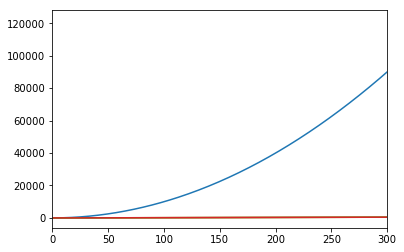

In [163]:
import matplotlib.pyplot as plt

hw0 = 20.0
hw1 = 30.0
hw2 = 40.0
Nmax = np.arange(1,350,1)/np.max(Nmax)
y_func0 = np.asarray([func(hw0,ni) for ni in Nmax  ])
y_func1 = np.asarray([func(hw0,ni) for ni in Nmax  ])
y_func2 = np.asarray([func(hw0,ni) for ni in Nmax  ])
y_pred0 = np.asarray([model.predict(np.asarray([[hw0,ni]]))[0] for ni in Nmax  ])
y_pred1 = np.asarray([model.predict(np.asarray([[hw1,ni]]))[0] for ni in Nmax  ])
y_pred2 = np.asarray([model.predict(np.asarray([[hw2,ni]]))[0] for ni in Nmax  ])

plt.clf()
plt.plot(Nmax,y_func0)
#plt.plot(Nmax,y_func1)
#plt.plot(Nmax,y_func2)
plt.plot(Nmax,y_pred0)
plt.plot(Nmax,y_pred1)
plt.plot(Nmax,y_pred2)
plt.xlim([0,300])
#plt.ylim([9.8,10.2])
plt.show()